In [2]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import matplotlib
import numpy as np

In [3]:
max_interval_time=timedelta(hours=3)
min_interval_time=timedelta(seconds=0)
##Read origin data
df=pd.read_pickle('data/2to9data.pkl')

In [4]:
#df

In [5]:
#df.loc[df['user']=='11011110110011000101100010000010']

In [6]:
#get the list of the User
# userlist=df['user'].drop_duplicates()
# userlist=userlist.iloc[::-1]
#userlist

In [7]:
#show single user data
#df.loc[df_short['user']==userlist.iloc[0]]

In [8]:
##transfer the 'time' data from str to datatime for subsequent processing
df['time']=pd.to_datetime(df['time'])
df['interval']=df['time'].shift(-1)-df['time']#to get the watch interval by subtracting from row to row
df_cut=df.drop(df.groupby(['user']).tail(1).index, axis=0)#throw the last record of each user as the interval is invalid

In [9]:
#df_cut

In [10]:
#WI for Watch_Interval and we eliminate the watch interval==0 second or >3 hours which we think it is in inactive status
WI=df_cut.drop(df_cut[df_cut['interval']<=min_interval_time].index)
WI=WI.drop(WI[WI['interval']>max_interval_time].index)

In [13]:
#duplicate the same watched item and only retain the max interval
filtered_WI=WI.sort_values(by=['user','item','interval'],ascending=[False,True,True])
filtered_WI=filtered_WI.drop_duplicates(subset=['user','item'], keep='last')

In [12]:
filtered_WI

,time,user,item,interval
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02
4691726,2010-06-29 19:30:07,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:22:03
4696297,2010-06-29 19:52:10,11011110111110011001100100010011,传奇故事-100122-那天晚上到底发生了什么.mp4,0 days 00:00:26
7140278,2010-07-01 09:32:57,11011110111110011001100011000001,敢死队(第32集).mp4,0 days 00:00:01
...,...,...,...,...
9857524,2010-07-03 23:59:33,00111010000100000000000100000010,王牌大贱谍-091110-我再穷都要有一部车.mp4,0 days 00:00:15
6948851,2010-07-01 12:03:44,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:52
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46


In [23]:
# to get the max watch time for each item from all users, and we consider it as the max length of the item
max_watchtime=filtered_WI.groupby(['item'])[['item','interval']].max().rename(columns={'interval':'max_interval'})

In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(max_watchtime.head(1000))

,item,max_interval
item,,
,,0 days 02:55:42
(21)寻找战士奶爸-08年5月16日 绵竹市汉旺金鱼嘴.mp4,(21)寻找战士奶爸-08年5月16日 绵竹市汉旺金鱼嘴.mp4,0 days 00:16:26
(23)寻找从容的李科-08年5月16日 成都凤凰山机场.mp4,(23)寻找从容的李科-08年5月16日 成都凤凰山机场.mp4,0 days 00:00:23
00100512中道齐家三部曲之二家庭教育(1).mp4,00100512中道齐家三部曲之二家庭教育(1).mp4,0 days 00:29:12
00100512中道齐家三部曲之二家庭教育(10).mp4,00100512中道齐家三部曲之二家庭教育(10).mp4,0 days 00:51:31
00100512中道齐家三部曲之二家庭教育(11).mp4,00100512中道齐家三部曲之二家庭教育(11).mp4,0 days 00:01:57
00100512中道齐家三部曲之二家庭教育(2).mp4,00100512中道齐家三部曲之二家庭教育(2).mp4,0 days 00:51:16
00100512中道齐家三部曲之二家庭教育(3).mp4,00100512中道齐家三部曲之二家庭教育(3).mp4,0 days 00:30:09
00100512中道齐家三部曲之二家庭教育(4).mp4,00100512中道齐家三部曲之二家庭教育(4).mp4,0 days 00:25:58


In [25]:
# df.loc[df['item']=='100126女孩的精湛射术.mp4']
# df.loc[(df['time']=='2010-06-30 04:02:37') &(df['item']=='100126女孩的精湛射术.mp4')]['user'].values[0]
# df.loc[df['user']==df.loc[(df['time']=='2010-06-30 04:02:37') &(df['item']=='100126女孩的精湛射术.mp4')]['user'].values[0]]

In [26]:
#caculate the watch ratio 
summary=filtered_WI.join(max_watchtime.set_index('item'), on='item')
summary['watch_ratio']=summary['interval']/summary['max_interval']

In [27]:
summary

,time,user,item,interval,max_interval,watch_ratio
4696297,2010-06-29 19:52:10,11011110111110011001100100010011,传奇故事-100122-那天晚上到底发生了什么.mp4,0 days 00:00:26,0 days 00:41:46,0.010375
4347670,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:29:02,0 days 00:54:19,0.534520
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02,0 days 00:13:01,0.002561
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13,0 days 02:58:59,0.090604
7141308,2010-07-01 09:42:19,11011110111110011001100011000001,敢死队(第01集).mp4,0 days 00:21:32,0 days 02:53:35,0.124052
...,...,...,...,...,...,...
3401708,2010-06-28 19:38:48,00111010000100000000000100000010,龙过鼠年.mp4,0 days 00:01:34,0 days 02:57:45,0.008814
6940217,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54,0 days 02:58:57,0.301201
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25,0 days 02:57:24,0.515314
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46,0 days 02:59:40,0.560853


In [28]:
test=summary.copy()

In [29]:
test.drop(test[test['watch_ratio']==1].index)

,time,user,item,interval,max_interval,watch_ratio
4696297,2010-06-29 19:52:10,11011110111110011001100100010011,传奇故事-100122-那天晚上到底发生了什么.mp4,0 days 00:00:26,0 days 00:41:46,0.010375
4347670,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:29:02,0 days 00:54:19,0.534520
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02,0 days 00:13:01,0.002561
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13,0 days 02:58:59,0.090604
7141308,2010-07-01 09:42:19,11011110111110011001100011000001,敢死队(第01集).mp4,0 days 00:21:32,0 days 02:53:35,0.124052
...,...,...,...,...,...,...
3401708,2010-06-28 19:38:48,00111010000100000000000100000010,龙过鼠年.mp4,0 days 00:01:34,0 days 02:57:45,0.008814
6940217,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54,0 days 02:58:57,0.301201
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25,0 days 02:57:24,0.515314
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46,0 days 02:59:40,0.560853


<AxesSubplot:ylabel='Frequency'>

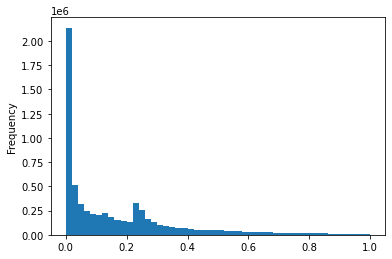

In [32]:
test2=test.drop(test[test['watch_ratio']==1].index)
test2['watch_ratio'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

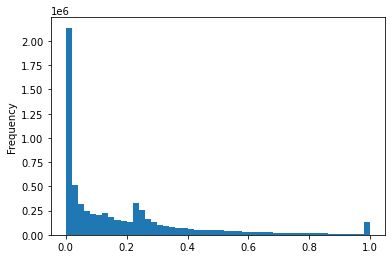

In [33]:
test['watch_ratio'].plot.hist(bins=50)

In [34]:
len(test)

6707506

In [36]:
summary.to_pickle('10M_watch_ratio_without_connection_dropdupilcate_max.pkl')